In [713]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [714]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("sumateraselatan.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       364 non-null    float64       
 2   Tx       363 non-null    float64       
 3   Tavg     364 non-null    float64       
 4   RH_avg   364 non-null    float64       
 5   RR       268 non-null    float64       
 6   ss       363 non-null    float64       
 7   ff_x     364 non-null    float64       
 8   ddd_x    363 non-null    float64       
 9   ff_avg   364 non-null    float64       
 10  ddd_car  364 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-714-85adb45e1c20>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [715]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,24.8,32.4,0.0,27.8
1,2023-02-01,24.8,32.2,0.9,27.4
2,2023-03-01,22.6,29.2,15.0,25.4
3,2023-04-01,22.8,28.6,0.0,25.4
4,2023-05-01,24.6,31.8,8888.0,27.0
...,...,...,...,...,...
360,2023-12-16,25.9,33.4,8888.0,29.7
361,2023-12-17,25.8,31.4,35.0,29.5
362,2023-12-18,25.6,32.8,4.6,29.3
363,2023-12-19,25.2,NaN,18.0,28.5


In [716]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [717]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [718]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [719]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,24.8,32.4,0.0,27.8
1,31,31,2023-01-02,24.1,30.9,7.5,26.7
2,59,60,2023-01-03,23.9,30.2,1.7,26.6
3,90,92,2023-01-04,24.5,31.5,NaN,28.0
4,120,123,2023-01-05,23.4,32.0,51.6,26.1
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,25.9,33.4,0.0,29.7
350,350,361,2023-12-17,25.8,31.4,35.0,29.5
351,351,362,2023-12-18,25.6,32.8,4.6,29.3
352,352,363,2023-12-19,25.2,NaN,18.0,28.5


In [720]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          1
Tx          2
RR         94
Tavg        1
dtype: int64

In [721]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [722]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

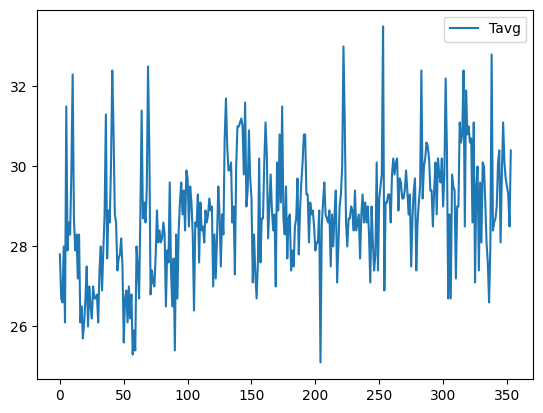

In [723]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

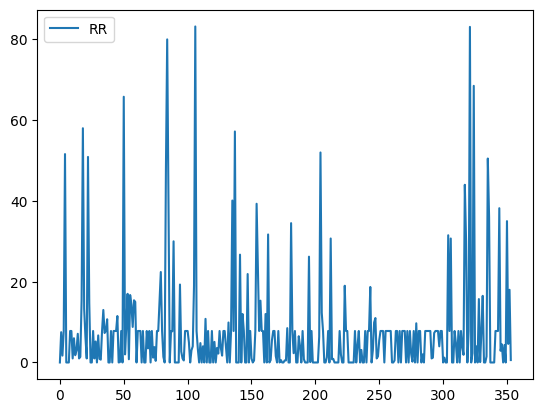

In [724]:
#plotting tavg
df1[['RR']].plot()

In [725]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,24.8,32.40000,0.000000,27.8,30.90000,26.7,7.500000
1,31,31,2023-01-02,24.1,30.90000,7.500000,26.7,30.20000,26.6,1.700000
2,59,60,2023-01-03,23.9,30.20000,1.700000,26.6,31.50000,28.0,7.796538
3,90,92,2023-01-04,24.5,31.50000,7.796538,28.0,32.00000,26.1,51.600000
4,120,123,2023-01-05,23.4,32.00000,51.600000,26.1,34.60000,31.5,0.000000
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,25.9,33.40000,0.000000,29.7,31.40000,29.5,35.000000
350,350,361,2023-12-17,25.8,31.40000,35.000000,29.5,32.80000,29.3,4.600000
351,351,362,2023-12-18,25.6,32.80000,4.600000,29.3,33.58892,28.5,18.000000
352,352,363,2023-12-19,25.2,33.58892,18.000000,28.5,33.60000,30.4,0.600000


In [726]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.000000,27.8,26.7,7.500000
1,7.500000,26.7,26.6,1.700000
2,1.700000,26.6,28.0,7.796538
3,7.796538,28.0,26.1,51.600000
4,51.600000,26.1,31.5,0.000000
...,...,...,...,...
349,0.000000,29.7,29.5,35.000000
350,35.000000,29.5,29.3,4.600000
351,4.600000,29.3,28.5,18.000000
352,18.000000,28.5,30.4,0.600000


In [727]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.000000,27.8,26.7,7.500000
1,7.500000,26.7,26.6,1.700000
2,1.700000,26.6,28.0,7.796538
3,7.796538,28.0,26.1,51.600000
4,51.600000,26.1,31.5,0.000000
...,...,...,...,...
348,4.300000,30.1,29.7,0.000000
349,0.000000,29.7,29.5,35.000000
350,35.000000,29.5,29.3,4.600000
351,4.600000,29.3,28.5,18.000000


In [728]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [729]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.000000,27.8,26.7,7.500000,0
1,7.500000,26.7,26.6,1.700000,1
2,1.700000,26.6,28.0,7.796538,2
3,7.796538,28.0,26.1,51.600000,3
4,51.600000,26.1,31.5,0.000000,4
...,...,...,...,...,...
348,4.300000,30.1,29.7,0.000000,348
349,0.000000,29.7,29.5,35.000000,349
350,35.000000,29.5,29.3,4.600000,350
351,4.600000,29.3,28.5,18.000000,351


In [730]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [731]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [732]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [733]:
X_test

,Indeks,Tavg
282,282,29.5
283,283,32.4
284,284,29.2
285,285,30.0
286,286,30.2
...,...,...
348,348,30.1
349,349,29.7
350,350,29.5
351,351,29.3


In [734]:
#testing
pred1 = lr.predict(X_test)
pred1

array([29.44321536, 30.70033692, 29.31978643, 29.66885695, 29.75848432,
       29.93459275, 29.89449854, 29.76792329, 29.42514541, 29.42829173,
       29.04227332, 29.43458437, 29.74041437, 29.18229132, 29.78994753,
       29.62013175, 29.53679702, 29.7993865 , 29.28364651, 29.63271704,
       30.67363597, 29.89845283, 28.30169971, 29.21289707, 28.30799235,
       29.65159496, 29.52501971, 29.4849255 , 28.53678027, 29.31825604,
       29.32140236, 30.23259972, 30.01954341, 30.10917079, 30.80416551,
       29.12093134, 30.59425553, 30.12175607, 30.21138344, 30.04156766,
       30.08795451, 29.18304979, 30.26720925, 28.54073455, 29.58165349,
       29.80100243, 28.67989509, 29.63433297, 28.98887141, 29.85682824,
       29.81673404, 29.43071563, 29.0014567 , 28.78840039, 28.35914146,
       28.96765514, 31.04634668, 29.14690988, 29.23653725, 29.2829241 ,
       29.41579199, 29.8945841 , 30.02745199, 29.03606623, 29.77430148,
       30.33957463, 29.9103157 , 29.74049992, 29.65716519, 29.57

In [735]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

1.076138584644547 1.9842614145774087


In [736]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,29.5
283,283,32.4
284,284,29.2
285,285,30.0
286,286,30.2
...,...,...
348,348,30.1
349,349,29.7
350,350,29.5
351,351,29.3


In [737]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,29.443215
283,30.700337
284,29.319786
285,29.668857
286,29.758484
...,...
348,29.910316
349,29.740500
350,29.657165


In [738]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-738-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.8,NaN
1,26.7,NaN
2,26.6,NaN
3,28.0,NaN
4,26.1,NaN
...,...,...
348,30.1,29.910316
349,29.7,29.740500
350,29.5,29.657165
351,29.3,29.573830


<Axes: >

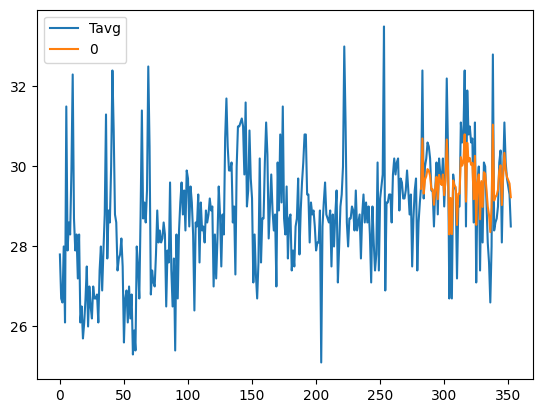

In [739]:
kan.plot()

In [740]:
new_data = [[354, 28.5],[355,28.5],[356,28.5],[357,28.5],[358,28.5],[359,28.5],[360,28.5]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29.23734522, 29.24049154, 29.24363786, 29.24678418, 29.2499305 ,
       29.25307682, 29.25622314])

In [742]:
kan.to_json('Prediksi Sumatera Selatan.json')